In [1]:
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
import pandas as pd
import nsepy
import seaborn as sns
from sklearn import tree
import ta
from sklearn.preprocessing import normalize
from numpy import linalg as LA

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [4]:
#df=nsepy.get_history(symbol='EICHERMOT',start=datetime.date(2001,1,1),end=datetime.date(2018,12,31))
#df=pd.read_csv("sbin.csv")

In [5]:
#df.to_csv("EICHERMOT.csv")
df=pd.read_csv("SUNPHARMA11.csv")

In [6]:
df=df.drop(columns =['Symbol', 'Series','Turnover','Trades','Deliverable Volume','%Deliverble','VWAP']) 

In [7]:
df["ho"]=(((df.High-df.Open)/df.Open)*100)

In [8]:
df["ol"]=(((df.Open-df.Low)/df.Open)*100)

In [9]:
df["oc"]=(((df.Open-df.Close)/df.Open)*100)

In [10]:
df["hl"]=(((df.High-df.Low)/df.Low)*100)

In [15]:
df['rsi']=ta.momentum.rsi(df["Close"], n=14, fillna=False)
df['r']=ta.momentum.wr(df["High"], df["Low"], df["Close"], lbp=14, fillna=False)
df['cci']=ta.trend.cci(df["High"], df["Low"], df["Close"], n=20, c=0.015, fillna=False) 
df['roc']=ta.momentum.roc(df['Close'], n = 14, fillna = False)
df['mfi']=ta.volume.money_flow_index(df['High'], df['Low'], df['Close'], df['Volume'], n=14, fillna=False)
#df['bollinger_band']=ta.trend.bollinger_bands(df['Close'], n = 20, fillna = False)
df['macd']=ta.trend.macd(df['Close'], n_slow=26, n_fast=12, fillna=False)
df['ema']=ta.trend.ema_indicator(df['Close'], n = 14, fillna = False)
df['sma']=ta.trend.sma_indicator(df['Close'], n = 14, fillna = False)

df['bmavg']=ta.volatility.bollinger_mavg(df["Close"], n=20, fillna=False)
df['dchb']=ta.volatility.donchian_channel_hband(df["High"], df["Low"], df["Close"], n=20, offset=0, fillna=False)
df['bi']=ta.volatility.bollinger_hband_indicator(df["Close"], n=20, ndev=2, fillna=False)
df['vpt']=ta.volume.volume_price_trend(df["Close"], df["Volume"], fillna=False)
df['seom']=ta.volume.sma_ease_of_movement(df["High"], df["Low"], df["Volume"], n=14, fillna=False)
df['obv']=ta.volume.on_balance_volume(df["Close"], df["Volume"], fillna=False)
df['nvi']=ta.volume.negative_volume_index(df["Close"], df["Volume"], fillna=False)
df['fi']=ta.volume.force_index(df["Close"], df["Volume"], n=13, fillna=False)
df['eom']=ta.volume.ease_of_movement(df["High"], df["Low"], df["Volume"], n=14, fillna=False)
df['cmf']=ta.volume.chaikin_money_flow(df["High"], df["Low"], df["Close"], df["Volume"], n=20, fillna=False)
df['adi']=ta.volume.acc_dist_index(df["High"], df["Low"], df["Close"], df["Volume"], fillna=False)

In [16]:
df["m1"]=(df["Close"]/df["Close"].shift(1))*1000

In [17]:
df["m2"]=(df["Close"]/df["Close"].shift(2))*1000

In [18]:
df["m3"]=(df["Close"]/df["Close"].shift(3))*1000

In [19]:
df["m4"]=(df["Close"]/df["Close"].shift(4))*1000

In [20]:
df["m5"]=(df["Close"]/df["Close"].shift(5))*1000

In [21]:
df["m6"]=(df["Close"]/df["Close"].shift(6))*1000

In [22]:
df["pvc"]=(df["Volume"]-df["Volume"].shift(1))/df["Volume"].shift(1)*1000

In [23]:
df["pdc"]=(df["Close"]-df["Close"].shift(1))/df["Close"].shift(1)*1000

In [24]:
df['std_3'] = df['pdc'].rolling(5).std()
df['ret_3'] = df['pdc'].rolling(5).mean()

In [25]:
df["nextOpen"]=(df["Open"].shift(-1)-df["Close"])/df["Close"]*1000

In [26]:
df["Signal"]=""

In [27]:
df['cci'].tail(14)

4463   -113.105941
4464    -14.918977
4465     -0.143995
4466      2.323403
4467     28.077932
4468     35.772539
4469     84.575575
4470     90.324941
4471     57.792999
4472     -1.349747
4473    -30.344154
4474    -25.732553
4475    -15.733922
4476     -7.219682
Name: cci, dtype: float64

In [28]:
df["oc1"]=df["oc"].shift(-1)

In [29]:
df["pdc1"]=df["pdc"].shift(-1)

In [30]:
df.tail(5)

,Date,Prev Close,Open,High,Low,Last,Close,Volume,ho,ol,...,m5,m6,pvc,pdc,std_3,ret_3,nextOpen,Signal,oc1,pdc1
4472,2018-12-24,23597.60,23479.95,23575.0,23119.20,23164.3,23210.70,34687,0.404813,1.536417,...,979.445349,978.687519,-401.834831,-16.395735,13.263908,-4.074252,-4.769352,,0.080736,-5.572861
4473,2018-12-26,23210.70,23100.00,23450.0,22700.00,23038.0,23081.35,55049,1.515152,1.731602,...,967.136868,973.987037,587.021074,-5.572861,11.720220,-6.605411,9.473016,,1.311159,-3.762778
4474,2018-12-27,23081.35,23300.00,23383.0,22887.90,22995.0,22994.50,47478,0.356223,1.768670,...,959.875938,963.497747,-137.532017,-3.762778,10.469729,-8.112608,0.717563,,-0.491504,5.636130
4475,2018-12-28,22994.50,23011.00,23310.0,22995.00,23120.0,23124.10,37304,1.299379,0.069532,...,959.824838,965.285924,-214.288723,5.636130,10.452096,-8.123316,9.769029,,0.820771,1.481139
4476,2018-12-31,23124.10,23350.00,23390.0,23007.75,23085.0,23158.35,43103,0.171306,1.465739,...,981.385819,961.246472,155.452498,1.481139,8.347128,-3.722821,NaN,,NaN,NaN


In [31]:
df.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Volume',
       'ho', 'ol', 'oc', 'hl', 'rsi', 'r', 'cci', 'roc', 'mfi', 'macd', 'ema',
       'sma', 'm1', 'm2', 'm3', 'bmavg', 'dchb', 'bi', 'vpt', 'seom', 'obv',
       'nvi', 'fi', 'eom', 'cmf', 'adi', 'm4', 'm5', 'm6', 'pvc', 'pdc',
       'std_3', 'ret_3', 'nextOpen', 'Signal', 'oc1', 'pdc1'],
      dtype='object')

In [32]:
#sns.distplot(df["pdc"].fillna(0))

In [33]:
#df["pdc"].hist(bins=100)

In [34]:
#df["pdc"].value_counts()

In [35]:
#df["pdc"].value_counts(bins=10,normalize=True)

In [36]:
#df1=df.loc[(df['pdc1'] >= 1) & (df['oc1'] >= 1)]

In [37]:
#d=df.loc[(df['pdc1'] >= 1) & (df['oc1'] >= 1)]

In [38]:
#df["Signal"]=np.where(((df['pdc1'] >= 0.5) & (df['oc1'] >= 0.5)),"Buy",(np.where(((df['pdc1'] <= -0.5) & (df['oc1'] <= -0.5)),"SELL","HOLD")))

In [39]:
#df["Signal"]=np.where(((df['pdc1'] >= 1)),"Buy",(np.where(((df['pdc1'] <= -1)),"SELL","HOLD")))

In [40]:
df["Signal"]=np.where(((df['pdc1'] >= 0.5)),"BUY",(np.where(((df['pdc1'] <= -1)),"SELL","HOLD")))
#df["Signal"]=np.where(((df['pdc1'] >= 0.25)),"Buy",(np.where(((df['pdc1'] <= -0.25)),"SELL","HOLD")))

In [41]:
df["Signal"].value_counts()

BUY     2153
SELL    2103
HOLD     221
Name: Signal, dtype: int64

In [42]:
df.head(2)

,Date,Prev Close,Open,High,Low,Last,Close,Volume,ho,ol,...,m5,m6,pvc,pdc,std_3,ret_3,nextOpen,Signal,oc1,pdc1
0,2001-01-01,27.6,27.40,28.0,27.35,28.00,28.0,1929,2.189781,0.182482,...,NaN,NaN,NaN,NaN,NaN,NaN,-16.071429,BUY,-4.174229,25.000000
1,2001-01-02,28.0,27.55,29.5,27.55,28.05,28.7,8493,7.078040,0.000000,...,NaN,NaN,3402.799378,25.0,NaN,NaN,-10.452962,BUY,-3.521127,24.390244


In [43]:
df = df.fillna(df.mean(axis = 0))
#df = df.fillna(0)

In [44]:
df

,Date,Prev Close,Open,High,Low,Last,Close,Volume,ho,ol,...,m5,m6,pvc,pdc,std_3,ret_3,nextOpen,Signal,oc1,pdc1
0,2001-01-01,27.60,27.40,28.00,27.35,28.00,28.00,1929,2.189781,0.182482,...,1009.438102,1011.324182,1423.949039,1.868231,22.075606,1.862168,-16.071429,BUY,-4.174229,25.000000
1,2001-01-02,28.00,27.55,29.50,27.55,28.05,28.70,8493,7.078040,0.000000,...,1009.438102,1011.324182,3402.799378,25.000000,22.075606,1.862168,-10.452962,BUY,-3.521127,24.390244
2,2001-01-03,28.70,28.40,30.00,28.40,29.30,29.40,7820,5.633803,0.000000,...,1009.438102,1011.324182,-79.241728,24.390244,22.075606,1.862168,3.401361,SELL,1.694915,-13.605442
3,2001-01-04,29.40,29.50,29.95,29.00,29.00,29.00,5100,1.525424,1.694915,...,1009.438102,1011.324182,-347.826087,-13.605442,22.075606,1.862168,-1.724138,BUY,-1.899827,17.241379
4,2001-01-05,29.00,28.95,29.50,28.10,29.50,29.50,7493,1.899827,2.936097,...,1009.438102,1011.324182,469.215686,17.241379,22.075606,1.862168,10.169492,HOLD,1.006711,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,2018-12-24,23597.60,23479.95,23575.00,23119.20,23164.30,23210.70,34687,0.404813,1.536417,...,979.445349,978.687519,-401.834831,-16.395735,13.263908,-4.074252,-4.769352,SELL,0.080736,-5.572861
4473,2018-12-26,23210.70,23100.00,23450.00,22700.00,23038.00,23081.35,55049,1.515152,1.731602,...,967.136868,973.987037,587.021074,-5.572861,11.720220,-6.605411,9.473016,SELL,1.311159,-3.762778
4474,2018-12-27,23081.35,23300.00,23383.00,22887.90,22995.00,22994.50,47478,0.356223,1.768670,...,959.875938,963.497747,-137.532017,-3.762778,10.469729,-8.112608,0.717563,BUY,-0.491504,5.636130
4475,2018-12-28,22994.50,23011.00,23310.00,22995.00,23120.00,23124.10,37304,1.299379,0.069532,...,959.824838,965.285924,-214.288723,5.636130,10.452096,-8.123316,9.769029,BUY,0.820771,1.481139


In [45]:
X=df[['ho','ol','oc','hl','pvc','pdc','m1','m2','m3','m4','m5','m6','rsi','roc','r','cci','nextOpen','mfi','ema','sma','macd','bmavg','dchb','bi','vpt','seom','obv','nvi','fi','eom','cmf','adi']]
#X=df[['ho','ol','oc','hl','pvc','pdc','m1','m3','rsi','r','cci','std_5','ret_5','nextOpen']]

In [46]:
features = ['ho','ol','oc','hl','pvc','pdc','m1','m2','m3','m4','m5','m6','rsi','roc','r','cci','nextOpen','mfi','ema','sma','macd','bmavg','dchb','bi','vpt','seom','obv','nvi','fi','eom','cmf','adi']

In [48]:
len(features)

32

In [49]:
def initialize_population():
    population = np.random.randint(2, size=(20,32))
    features = ['ho','ol','oc','hl','pvc','pdc','m1','m2','m3','m4','m5','m6','rsi','roc','r','cci','nextOpen','mfi','ema','sma','macd','bmavg','dchb','bi','vpt','seom','obv','nvi','fi','eom','cmf','adi']
    return population,features

In [50]:
# population = np.random.randint(0,2, size=(10,21))
# population
# x = np.random.randint(low = 0,high = 2)
# print(x)

In [51]:
def cost(features,chromosome):
    feature_selected = []
    for i in range(len(features)):
        if chromosome[i] == 1:
            feature_selected.append(features[i])
    x = df[feature_selected]
    x_abs=x.abs()
    xMax = x_abs.max()
    x = x/xMax
    y = df[['Signal']]
    dataset_length = df.shape[0]
    split = int(dataset_length * 0.8)
    x_train = x[14:split]
    x_test = x[split:-1]
    y_train = y[14:split]
    y_test = y[split:-1]
    clf = RandomForestClassifier(n_estimators=100,random_state=5)
    clf.fit(x_train, y_train)
    t=clf.predict(x_test)
    #print("Accuracy:",accuracy_score(y_test, t))
    return accuracy_score(y_test, t)

In [52]:
def random_combine(parents,n_offspring):
    offspring = []
    n_parents = parents.shape[0]
    for i in range(n_offspring):
        random_dad = parents[np.random.randint(low =0,high = n_parents - 1)]
        random_mom = parents[np.random.randint(low =0,high = n_parents - 1)]
        dad_mask = np.random.randint(0,2,np.array(random_dad).shape)
        mom_mask = np.logical_not(dad_mask)
        child = np.add(np.multiply(random_dad,dad_mask),np.multiply(random_mom,mom_mask))
        offspring.append(child)
    offspring = np.array(offspring)
    #print("Mating:",offspring)
    return offspring

In [53]:
def mutate_parent(parent,n_mutations):
    size1 = parent.shape[0]
    #size2 = parent.shape[1]
    for i in range(n_mutations):
        rand1 = np.random.randint(0,size1)
        #rand2 = np.random.randint(0,size2)
        if parent[rand1] == 0:
            parent[rand1] = 1
        else:
            parent[rand1] = 0
    #print("Mutated parent:",parent)
    return parent
def mutate_gen(parent_gen,n_mutations):
    mutated_parent_gen = []
    for parent in parent_gen:
        mutated_parent_gen.append(mutate_parent(parent,n_mutations))
    mutated_parent_gen = np.array(mutated_parent_gen)
    #print("Mutated population:",mutated_parent_gen)
    return mutated_parent_gen

In [54]:
def select_best(features,parent_gen):
    costs = []
    selected_parent = []
    for i in range(len(parent_gen)):
        costs.append(cost(features,parent_gen[i]))
        #print("Cost",[i],"=",costs[i])
        if costs[i] > 0.4:
            selected_parent.append(parent_gen[i])
            #print("Selected",[i],"=",selected_parent[i])
    #print(costs) 
    costs = np.array(costs)
    selected_parent = np.array(selected_parent)
    #print(selected_parent)
    #print(costs)
    #print(selected_parent.shape)
    max_index = np.where(costs == np.amax(costs))
    feasible_features = (parent_gen[max_index])[0]
    #print("Feasible feature:",feasible_features)
    return selected_parent,costs,feasible_features

In [55]:
def gen_algo():
    parent_gen,features = initialize_population()
    print(parent_gen.shape)
    generations = 50
    overall_costs = []
    overall_features = []
    for i in range(generations):
        print("Generation number :",i+1)
        parent_gen,costs,feasible_features = select_best(features,parent_gen)
        print("Accuracy for this generation:",np.amax(costs))
        print("Feasible features for this generation:",feasible_features)
        overall_costs.append(np.amax(costs))
        overall_features.append(feasible_features)
        if np.amax(costs) >= 0.6 :
            print("Final cost:",np.amax(costs))
            print("Final features:",feasible_features)
            return feasible_features
        if parent_gen.shape[0] <= 1:
            parent_gen,features = initialize_population()
        else :
            parent_gen = random_combine(parent_gen,20)
        parent_gen = mutate_gen(parent_gen,2)
        print("=============================================================================================================")
    overall_costs = np.array(overall_costs)
    overall_features = np.array(overall_features)
    #best_child,costs,feasible_features = select_best(features,parent_gen)
    max_index = np.where(overall_costs == np.amax(overall_costs))
    print("Final cost:",np.amax(overall_costs))
    print("Final features:",(overall_features[max_index])[0])
    return (overall_features[max_index])[0]

In [56]:
final_feature = gen_algo()

(20, 32)
Generation number : 1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5318435754189944
Feasible features for this generation: [1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1]
Generation number : 2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5251396648044693
Feasible features for this generation: [1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1]
Generation number : 3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5418994413407822
Feasible features for this generation: [1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1]
Generation number : 4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.529608938547486
Feasible features for this generation: [1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1]
Generation number : 5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5318435754189944
Feasible features for this generation: [0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1]
Generation number : 6


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5363128491620112
Feasible features for this generation: [1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1]
Generation number : 7


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5385474860335195
Feasible features for this generation: [1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1]
Generation number : 8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5284916201117319
Feasible features for this generation: [1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0]
Generation number : 9


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5418994413407822
Feasible features for this generation: [1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1]
Generation number : 10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5508379888268157
Feasible features for this generation: [1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1]
Generation number : 11


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5463687150837989
Feasible features for this generation: [0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1]
Generation number : 12


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5553072625698324
Feasible features for this generation: [0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1]
Generation number : 13


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5564245810055866
Feasible features for this generation: [0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1]
Generation number : 14


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5329608938547487
Feasible features for this generation: [0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1]
Generation number : 15


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5284916201117319
Feasible features for this generation: [0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1]
Generation number : 16


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5385474860335195
Feasible features for this generation: [0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1]
Generation number : 17


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5374301675977654
Feasible features for this generation: [0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1]
Generation number : 18


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5452513966480447
Feasible features for this generation: [0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0]
Generation number : 19


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5452513966480447
Feasible features for this generation: [0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1]
Generation number : 20


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5418994413407822
Feasible features for this generation: [0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
Generation number : 21


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5553072625698324
Feasible features for this generation: [0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1]
Generation number : 22


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5284916201117319
Feasible features for this generation: [0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1]
Generation number : 23


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5340782122905028
Feasible features for this generation: [1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1]
Generation number : 24


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5273743016759777
Feasible features for this generation: [1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1]
Generation number : 25


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5430167597765363
Feasible features for this generation: [0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1]
Generation number : 26


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5541899441340782
Feasible features for this generation: [0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1]
Generation number : 27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5497206703910614
Feasible features for this generation: [1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1]
Generation number : 28


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5430167597765363
Feasible features for this generation: [1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1]
Generation number : 29


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5452513966480447
Feasible features for this generation: [1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1]
Generation number : 30


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.553072625698324
Feasible features for this generation: [0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1]
Generation number : 31


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5307262569832403
Feasible features for this generation: [1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0]
Generation number : 32


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5452513966480447
Feasible features for this generation: [0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1]
Generation number : 33


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5407821229050279
Feasible features for this generation: [0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1]
Generation number : 34


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5385474860335195
Feasible features for this generation: [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0]
Generation number : 35


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.529608938547486
Feasible features for this generation: [1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0]
Generation number : 36


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5329608938547487
Feasible features for this generation: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0]
Generation number : 37


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5329608938547487
Feasible features for this generation: [0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1]
Generation number : 38


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.529608938547486
Feasible features for this generation: [0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1]
Generation number : 39


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.553072625698324
Feasible features for this generation: [1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1]
Generation number : 40


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5318435754189944
Feasible features for this generation: [1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0]
Generation number : 41


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5407821229050279
Feasible features for this generation: [1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1]
Generation number : 42


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.535195530726257
Feasible features for this generation: [1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0]
Generation number : 43


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5374301675977654
Feasible features for this generation: [1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0]
Generation number : 44


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5217877094972067
Feasible features for this generation: [1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]
Generation number : 45


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5519553072625698
Feasible features for this generation: [1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0]
Generation number : 46


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.547486033519553
Feasible features for this generation: [1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1]
Generation number : 47


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5486033519553073
Feasible features for this generation: [1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1]
Generation number : 48


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.547486033519553
Feasible features for this generation: [1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1]
Generation number : 49


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5329608938547487
Feasible features for this generation: [1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1]
Generation number : 50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vec

Accuracy for this generation: 0.5441340782122905
Feasible features for this generation: [1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1]
Final cost: 0.5564245810055866
Final features: [0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1]


In [57]:
print(final_feature)

[0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1]


In [58]:
features = ['ho','ol','oc','hl','pvc','pdc','m1','m2','m3','m4','m5','m6','rsi','roc','r','cci','nextOpen','mfi','ema','sma','macd','bmavg','dchb','bi','vpt','seom','obv','nvi','fi','eom','cmf','adi']

In [59]:
feature_selected = []
for i in range(len(final_feature)):
    if final_feature[i] == 1:
        feature_selected.append(features[i])
X = df[feature_selected]

In [60]:
X.columns

Index(['ol', 'pdc', 'm4', 'm5', 'm6', 'rsi', 'roc', 'nextOpen', 'bmavg',
       'seom', 'nvi', 'fi', 'adi'],
      dtype='object')

In [61]:
X_abs = X.abs()
XMax = X_abs.max()
X=X/XMax

In [62]:
X

,ol,pdc,m4,m5,m6,rsi,roc,nextOpen,bmavg,seom,nvi,fi,adi
0,0.008151,0.009333,0.639798,0.651612,0.663094,0.582756,0.041343,-0.070791,0.192104,-0.008030,0.810301,0.005225,0.000233
1,0.000000,0.124885,0.639798,0.651612,0.663094,0.582756,0.041343,-0.046043,0.192104,-0.008030,0.810301,0.005225,0.000416
2,0.000000,0.121839,0.639798,0.651612,0.663094,0.582756,0.041343,0.014982,0.192104,-0.008030,0.830065,0.005225,0.000652
3,0.075710,-0.067964,0.639798,0.651612,0.663094,0.582756,0.041343,-0.007594,0.192104,-0.008030,0.818771,0.005225,0.000037
4,0.131152,0.086127,0.669017,0.651612,0.663094,0.582756,0.041343,0.044794,0.192104,-0.008030,0.818771,0.005225,0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,0.068630,-0.081903,0.617573,0.632252,0.641695,0.512394,-0.012709,-0.021008,0.728650,0.081975,0.001040,-0.012056,-0.676994
4473,0.077348,-0.027839,0.611822,0.624306,0.638613,0.497969,0.019699,0.041726,0.727515,0.081006,0.001040,-0.016463,-0.676882
4474,0.079004,-0.018797,0.606072,0.619619,0.631735,0.488035,0.054989,0.003161,0.727333,0.118008,0.001037,-0.017660,-0.680141
4475,0.003106,0.028155,0.622257,0.619586,0.632908,0.506305,0.052628,0.043030,0.726712,0.130483,0.001042,-0.010976,-0.680952


In [63]:
Y=df[['Signal']]

In [64]:
len(X)

4477

In [65]:
X

,ol,pdc,m4,m5,m6,rsi,roc,nextOpen,bmavg,seom,nvi,fi,adi
0,0.008151,0.009333,0.639798,0.651612,0.663094,0.582756,0.041343,-0.070791,0.192104,-0.008030,0.810301,0.005225,0.000233
1,0.000000,0.124885,0.639798,0.651612,0.663094,0.582756,0.041343,-0.046043,0.192104,-0.008030,0.810301,0.005225,0.000416
2,0.000000,0.121839,0.639798,0.651612,0.663094,0.582756,0.041343,0.014982,0.192104,-0.008030,0.830065,0.005225,0.000652
3,0.075710,-0.067964,0.639798,0.651612,0.663094,0.582756,0.041343,-0.007594,0.192104,-0.008030,0.818771,0.005225,0.000037
4,0.131152,0.086127,0.669017,0.651612,0.663094,0.582756,0.041343,0.044794,0.192104,-0.008030,0.818771,0.005225,0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,0.068630,-0.081903,0.617573,0.632252,0.641695,0.512394,-0.012709,-0.021008,0.728650,0.081975,0.001040,-0.012056,-0.676994
4473,0.077348,-0.027839,0.611822,0.624306,0.638613,0.497969,0.019699,0.041726,0.727515,0.081006,0.001040,-0.016463,-0.676882
4474,0.079004,-0.018797,0.606072,0.619619,0.631735,0.488035,0.054989,0.003161,0.727333,0.118008,0.001037,-0.017660,-0.680141
4475,0.003106,0.028155,0.622257,0.619586,0.632908,0.506305,0.052628,0.043030,0.726712,0.130483,0.001042,-0.010976,-0.680952


In [66]:
len(Y)

4477

In [67]:
X[1:].isnull().values.any()


False

In [68]:
# Total dataset length
dataset_length = df.shape[0]

# Training dataset length
split = int(dataset_length * 0.8)

split

3581

In [69]:
X_train = X[14:split]
X_test = X[split:-1]
Y_train = Y[14:split]
Y_test = Y[split:-1]

In [70]:
# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3567, 13) (895, 13)
(3567, 1) (895, 1)


In [71]:
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, Y_train)

In [72]:
#kf = KFold(n_splits=15 ,shuffle=True)
clf = RandomForestClassifier(n_estimators=100,random_state=5)
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [73]:
# scores=[]
# for i in range(10):
#     result=next(kf.split(X_train),None)
#     x_train=X_train.iloc[result[0]]
#     x_test=X_train.iloc[result[1]]
#     y_train=Y_train.iloc[result[0]]
#     y_test=Y_train.iloc[result[1]]
#     print("Epoch number :",i+1)
#     print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
#     model = clf.fit(x_train,y_train)
#     pred = clf.predict(x_test)
#     #scores.append(model.score(x_test,y_test))
#     scores.append(accuracy_score(y_test, pred))
#     print("Score :",accuracy_score(y_test, pred))
# print("Average score:",np.mean(scores))

In [74]:
p=clf.predict(X_train)

In [75]:
np.unique(p)

array(['BUY', 'HOLD', 'SELL'], dtype=object)

In [76]:
from sklearn.metrics import classification_report
report = classification_report(Y_train, p)
print(report)

              precision    recall  f1-score   support

         BUY       1.00      1.00      1.00      1717
        HOLD       1.00      1.00      1.00       181
        SELL       1.00      1.00      1.00      1669

    accuracy                           1.00      3567
   macro avg       1.00      1.00      1.00      3567
weighted avg       1.00      1.00      1.00      3567



In [77]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(Y_train, p) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(Y_train, p))


Confusion Matrix :
[[1717    0    0]
 [   0  181    0]
 [   0    0 1669]]
Accuracy Score : 1.0


In [78]:
t=clf.predict(X_test)

In [79]:
np.unique(t)

array(['BUY', 'SELL'], dtype=object)

In [80]:
results = confusion_matrix(Y_test, t) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(Y_test, t))


Confusion Matrix :
[[189   0 240]
 [ 15   0  23]
 [119   0 309]]
Accuracy Score : 0.5564245810055866


In [81]:
report = classification_report(Y_test, t)
print(report)

              precision    recall  f1-score   support

         BUY       0.59      0.44      0.50       429
        HOLD       0.00      0.00      0.00        38
        SELL       0.54      0.72      0.62       428

    accuracy                           0.56       895
   macro avg       0.38      0.39      0.37       895
weighted avg       0.54      0.56      0.54       895



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
clf.feature_importances_

array([0.06977117, 0.07970527, 0.07448486, 0.07440748, 0.07371115,
       0.07619062, 0.07357133, 0.11415907, 0.07156563, 0.07557423,
       0.06755788, 0.07446438, 0.07483693])

In [83]:
len(t)

895

In [84]:
t

array(['SELL', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL', 'BUY', 'SELL',
       'BUY', 'SELL', 'SELL', 'SELL', 'BUY', 'SELL', 'SELL', 'BUY',
       'SELL', 'BUY', 'SELL', 'BUY', 'BUY', 'SELL', 'BUY', 'SELL', 'SELL',
       'SELL', 'BUY', 'SELL', 'SELL', 'BUY', 'BUY', 'BUY', 'SELL', 'BUY',
       'SELL', 'BUY', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL', 'BUY',
       'BUY', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL', 'BUY', 'BUY', 'BUY',
       'BUY', 'BUY', 'SELL', 'BUY', 'SELL', 'SELL', 'SELL', 'SELL',
       'SELL', 'SELL', 'SELL', 'SELL', 'BUY', 'SELL', 'SELL', 'SELL',
       'SELL', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY',
       'BUY', 'BUY', 'SELL', 'BUY', 'SELL', 'BUY', 'BUY', 'SELL', 'SELL',
       'SELL', 'SELL', 'BUY', 'SELL', 'SELL', 'BUY', 'SELL', 'SELL',
       'BUY', 'BUY', 'BUY', 'SELL', 'BUY', 'SELL', 'SELL', 'SELL', 'SELL',
       'SELL', 'BUY', 'BUY', 'SELL', 'BUY', 'BUY', 'SELL', 'SELL', 'SELL',
       'SELL', 'SELL', 'BUY', 'SELL', 'SELL', 'SELL', 'BUY', 'SELL'

In [85]:
sor=0
b=0
sorbnh=0
df["pm"]=0
df["bnh"]=0
df["pdcPM"]=0
for i in range(len(t)):
    if p[i]=="SELL" and df['Open'][split+i]>0.99*df['Close'][split+i-1]:
        b=0.0003*(df['Open'][split+i]+df['Close'][split+i])
        xy=((df['Open'][split+i]-df['Close'][split+i]-0)/df['Open'][split+i]*100)
        sor=sor+xy
    elif p[i]=="BUY" and df['Open'][split+i]<1.01*df['Close'][split+i-1]:
        #b=0.0003*(df['Open'][split+i]+df['Close'][split+i])
        xy=((df['Close'][split+i]-df['Open'][split+i]-0)/df['Open'][split+i]*100)
        sor=sor+xy
    else:
        xy=0
        sor=sor
    df['pm'][split+i]=sor
    df['pdcPM'][split+i]=xy
    sorbnh=sorbnh+df['pdc'][split+i]
    df["bnh"][split+i]=sorbnh
        
print("sum of return={}%".format(sor))
print("sum of return BnH={}%".format(sorbnh))
df.to_csv("df_modified.csv")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


sum of return=49.29416825370827%
sum of return BnH=397.42413504727136%


In [86]:
type(df['Open'][split+i])

numpy.float64

In [87]:
df1=df.iloc[split:-1]
df1.to_csv("sbin_sor.csv")

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['split', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


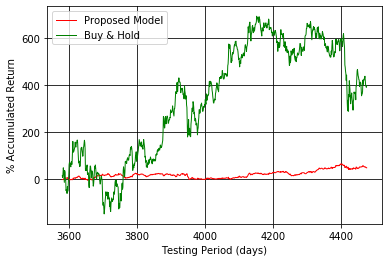

In [88]:
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
fig = plt.figure()
pylab.rcParams['figure.figsize'] = (15, 10)  
plt.plot(df1[['pm']],'r',label='Proposed Model',linewidth=1)
plt.plot(df1[['bnh']],'g',label='Buy & Hold', linewidth=1)

#plt.title('Epic Info')
plt.ylabel('% Accumulated Return')
plt.xlabel('Testing Period (days)')
plt.legend()
plt.grid(True,color='k')
plt.show()
fig.savefig('tatamotors.png')